In [194]:
import cv2
import matplotlib.pyplot as plt
import math
import numpy as np

In [195]:
img = cv2.imread('fruits.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

<function matplotlib.pyplot.show(*args, **kw)>

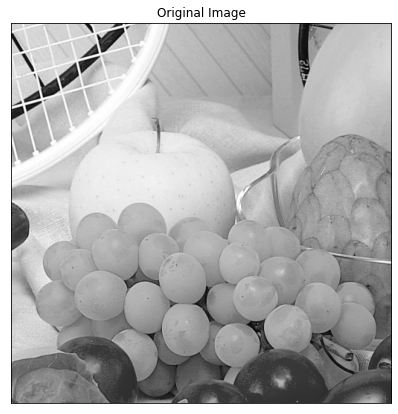

In [196]:
plt.figure(figsize=(7, 7))
plt.imshow(img, cmap = "gray")
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

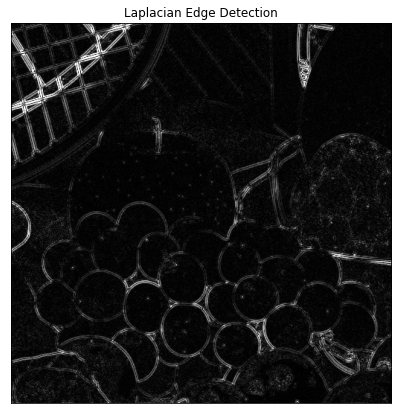

In [197]:
## Laplacian Edge Detection: How it can be done using openCV libraries
## Apply gaussian smoothing to remove noise
## Convert to gray scale 
## Apply the Laplacian filter
img_GB = cv2.GaussianBlur(img, (3, 3), 0)

img_LP = cv2.Laplacian(img_gray, cv2.CV_16S, ksize = 3)
img_abs = cv2.convertScaleAbs(img_LP)

plt.figure(figsize=(7, 7))
plt.imshow(img_abs, cmap = "gray")
plt.title('Laplacian Edge Detection'), plt.xticks([]), plt.yticks([])
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

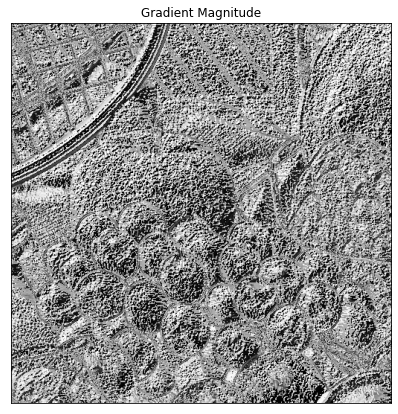

In [198]:
## Q1: Create a plugin called Gradient_Magnitude that computes the gradient magnitude of an image.

from scipy.ndimage.filters import convolve

def Gradient_Magnitude(img_grad):
    
    #3 Define x and y gradient
    x_grad = np.array([[-1, 0, 1],[-2, 0, 2],[-1, 0, 1]])
    y_grad = np.array([[-1, -2, -1],[0, 0, 0],[1, 2, 1]])
    
    ## Calculating the image gradient in each direction
    x_conv = convolve(img_grad, x_grad) / 8.0
    y_conv = convolve(img_grad, y_grad) / 8.0
    
    ## Calculate the gradient magnitude
    output_grad = np.sqrt(np.power(x_conv, 2) + np.power(y_conv, 2))
    
    ## Mapping values from 0 to 255
    output_grad = (output_grad / np.max(output_grad)) * 255
    
    return output_grad
    
## Testing out the gradient magnitude fnx
img_grad = cv2.imread('fruits.png')
img_grad = cv2.cvtColor(img_grad, cv2.COLOR_BGR2GRAY)
img_grad_final = Gradient_Magnitude(img_grad)

plt.figure(figsize=(7, 7))
plt.imshow(img_grad_final, cmap = "gray")
plt.title('Gradient Magnitude'), plt.xticks([]), plt.yticks([])
plt.show

In [211]:
## Q2: Create a plugin called Laplacian_ that computes the Laplacian of an image. Use Gaussian 2nd derivative filters.

from scipy.ndimage.filters import convolve

def convolve_img(image, kernel):
    wval = image.shape[1]
    hval = image.shape[0]
    
    pv = int(math.floor(kernel.shape[0]/2))
    image_op = np.zeros((hval, wval))

    for x in range(pv, wval - pv):
        for y in range(pv, hval - pv):
            for u in range(-pv, pv + 1):
                for v in range(-pv, pv + 1):
                    image_op[y, x] = image_op[y, x] + (kernel[pv + v, pv + u] * image[y + v, x + u])
    return image_op

def gauss_filter(shp = (3,3),sig_val = 0.5):
    p,q = [(i-1.)/2. for i in shp] 
    y,x = np.ogrid[-p:p+1,-q:q+1]
    
    hval = np.exp( -(x*x + y*y) / (2.*sig_val*sig_val))
    hval[ hval < np.finfo(hval.dtype).eps*hval.max() ] = 0
    
    h_sum = hval.sum()
    
    if h_sum != 0:
        hval /= h_sum

    return hval

def Laplacian_(img_ip):
    ## Get the gaussian kernel
    gauss_kernel = gauss_filter((3,3), 0.5)
    
    ## Smooth the image using the Gaussian Kernel
    img_smooth = convolve_img(img_ip, gauss_kernel)
    
    ## Get the Laplacian kernel
    laplacian_kernel = np.array([[0, 1, 0],
                                  [1, -4, 1],
                                  [0, 1, 0]], 
                                 dtype=np.float32)
    
    ## Compute the Laplacian
    img_lp = convolve_img(img_smooth, laplacian_kernel)
    return img_lp


<function matplotlib.pyplot.show(*args, **kw)>

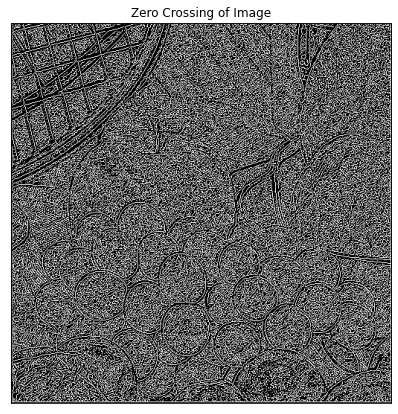

In [212]:
## Q3: Write a plugin filter called Zero_Crossings that calculates the zero crossings in an image. It should set a pixel to 1 if it is a zero crossing and 0 otherwise.

def Zero_Crossing(image):
    img_sg = np.sign(image)
    img_sg = np.pad(img_sg, ((0, 1), (0, 1)))
    z_x = img_sg[:-1, :-1] - img_sg[:-1, 1:] < 0
    z_y = img_sg[:-1, :-1] - img_sg[1:, :-1] < 0

    img_edges =  np.logical_or(z_x, z_y).astype(float)
    return img_edges


## Testing out the Zero-Crossing
img_zC = Zero_Crossing(img_lp_final)

plt.figure(figsize=(7, 7))
plt.imshow(img_zC, cmap = "gray")
plt.title('Zero Crossing of Image'), plt.xticks([]), plt.yticks([])
plt.show


<function matplotlib.pyplot.show(*args, **kw)>

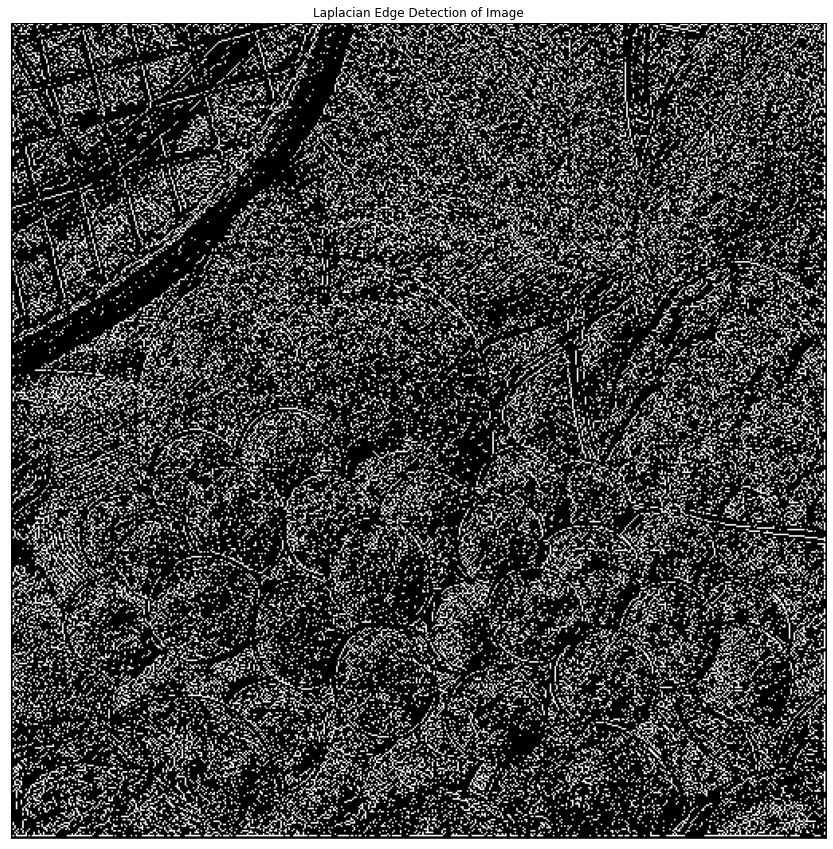

In [213]:
## Q4: Put it all together! Use the three filters above to do edge detection. Now you should have a threshold parameter to apply a threshold to the gradient magnitude. 
## Follow this by an AND operation with the result of the Laplacian zero‐crossing image. 
## Your resulting images should be binary, with 1 on the edges and 0 elsewhere. Call your plugin filter Laplacian_Edge_Detection.

def Laplacian_Edge_Detection(img_LED):
    threshold_value = 127
    ## Find Gradient of Image and apply thresholding
    img_grad = Gradient_Magnitude(img_LED)
    img_grad_thresh = cv2.threshold(img_grad, threshold_value, 1, cv2.THRESH_BINARY)[1]
    
    ## Find Laplacian of Image
    img_lp = Laplacian_(img_LED)
    
    ## Find Zero-Crossing of Laplacian
    img_zC = Zero_Crossing(img_lp)
    
    ## And the zero crossing image and image gradient
    img_LED_op = img_zC * img_grad_thresh
    
    return img_LED_op

## Testing out the Laplacian
img = cv2.imread('fruits.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img_final = Laplacian_Edge_Detection(img)

plt.figure(figsize=(15, 15))
plt.imshow(img_final, cmap = "gray")
plt.title('Laplacian Edge Detection of Image'), plt.xticks([]), plt.yticks([])
plt.show